In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('../data/wandb_data.csv')
df = df[['batch_size', 'seed' ,'test_r', 'test_mae']]
df.head()

,batch_size,seed,test_r,test_mae
0,128,4,0.644261,0.621138
1,128,3,0.650309,0.610149
2,128,2,0.652207,0.609901
3,128,1,0.628038,0.632175
4,128,0,0.628764,0.624649


In [11]:
summary = df.groupby('batch_size')['test_r'].agg(['mean', 'std']).reset_index()

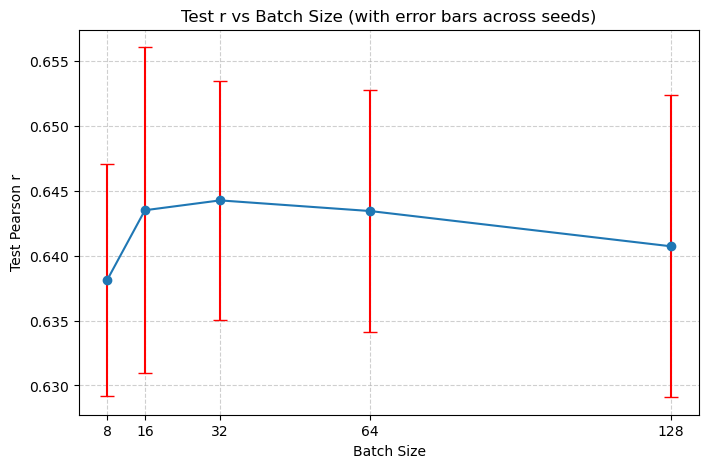

<Figure size 640x480 with 0 Axes>

In [23]:
# Plot
plt.figure(figsize=(8,5))
plt.errorbar(
    summary['batch_size'],
    summary['mean'],
    yerr=summary['std'],
    fmt='o-',            # line + points
    capsize=5,           # little cross bar at top of error bar
    ecolor='red',  # color of error bar
)

plt.xlabel("Batch Size")
plt.ylabel("Test Pearson r")
plt.xticks(summary['batch_size'])
plt.title("Test r vs Batch Size (with error bars across seeds)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
plt.tight_layout()